In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
print(tf.__version__)

In [ ]:
import scipy.io as sio

In [ ]:
X = sio.loadmat('X_10_30.mat')['X']

In [ ]:
X = np.transpose(X)

In [ ]:
np.shape(X)

In [ ]:
Y = sio.loadmat('Y_10_30.mat')['Y']
Y = np.transpose(Y)
np.shape(Y)

In [ ]:
np.shape(X)

In [ ]:

data_size = np.shape(X)[0]
train_size = 800
test_size = data_size - train_size
train_data = X[0:train_size,:]
train_labels = Y[0:train_size,:]

test_data = X[train_size:,:]
test_labels = Y[train_size:,:]




In [10]:
np.shape(train_labels)
train_labels.shape

(800, 20)

In [11]:
# Shuffle the training set
order = np.argsort(np.random.random(train_size))
train_data = train_data[order]
train_labels = train_labels[order]

In [12]:
train_labels.shape

(800, 20)

In [13]:
# Test data is *not* used when calculating the mean and std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[ 0.71733696  1.42506521 -2.26118449  0.55383543 -0.19229069 -0.39605725
 -0.37654725  1.41538142 -0.08944223 -0.41300475  1.57954784  0.44731331
 -0.79340629  0.22022433  1.02699091  0.75309357 -0.64252454  0.20848327
  1.08033206 -0.28955983 -1.327356   -0.72197363 -0.45103992  0.90630672
  0.5055798  -1.3551665   0.56890825  0.83064752  0.33495139  0.78931252
  0.62199499 -1.98437715 -0.74608758 -0.76942136  0.73040789  0.66830874
 -1.69213912  0.51376837  0.10525121 -0.31881418]


In [14]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(20, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    #keras.layers.Dense(10, activation=tf.nn.relu),
    #keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    #keras.layers.Dense(20, activation=tf.nn.relu),
    #keras.layers.Dense(20, activation=tf.nn.relu),
    #keras.layers.Dense(100, activation=tf.nn.relu),
    #keras.layers.Dense(100, activation=tf.nn.relu),
    #keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(20)
  ])

  #optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae','acc'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
Total params: 1,660
Trainable params: 1,660
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2000

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

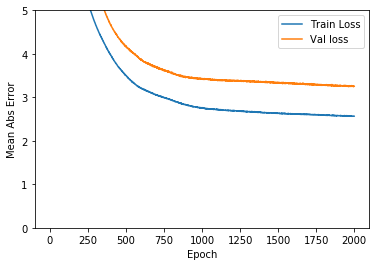

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)

In [17]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


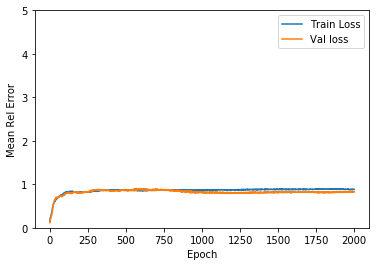

In [18]:
def plot_acc_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Rel Error')
  plt.plot(history.epoch, np.array(history.history['acc']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_acc_history(history)

In [19]:
[loss, mae, acc] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))
print("Testing set Accuracy: {:7.2f}".format(acc))

Testing set Mean Abs Error:    5.49
Testing set Accuracy:    0.77


In [20]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 45.49157  103.97787   34.752823 ...  24.387373  10.347808  13.98879 ]


In [21]:
for i in range(3):
    np.savetxt('W{:d}.txt'.format(i),model.layers[0].get_weights()[0])
    np.savetxt('B{:d}.txt'.format(i),model.layers[0].get_weights()[1])

In [22]:
model.layers

In [23]:
model.save('Model_20_20_L_10_30_h_40.h5')